# Load the Dataset

In [13]:
import pandas as pd
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Generate summary statistics

In [33]:
summary_stats=df.describe(include='all')
median = df.median(numeric_only=True)
mode = df.mode(numeric_only=True).iloc[0]
std_dev = df.std(numeric_only=True)
variance = df.var(numeric_only=True)
skewness = df.skew(numeric_only=True)
kurtosis = df.kurtosis(numeric_only=True)

summary_stats, median, mode, std_dev, variance, skewness, kurtosis

(        PassengerId    Survived      Pclass                     Name   Sex  \
 count    891.000000  891.000000  891.000000                      891   891   
 unique          NaN         NaN         NaN                      891     2   
 top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
 freq            NaN         NaN         NaN                        1   577   
 mean     446.000000    0.383838    2.308642                      NaN   NaN   
 std      257.353842    0.486592    0.836071                      NaN   NaN   
 min        1.000000    0.000000    1.000000                      NaN   NaN   
 25%      223.500000    0.000000    2.000000                      NaN   NaN   
 50%      446.000000    0.000000    3.000000                      NaN   NaN   
 75%      668.500000    1.000000    3.000000                      NaN   NaN   
 max      891.000000    1.000000    3.000000                      NaN   NaN   
 
                Age       SibSp       Parch  Ticke

# histograms and boxplots for numeric features.


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

sns.set(style="whitegrid")


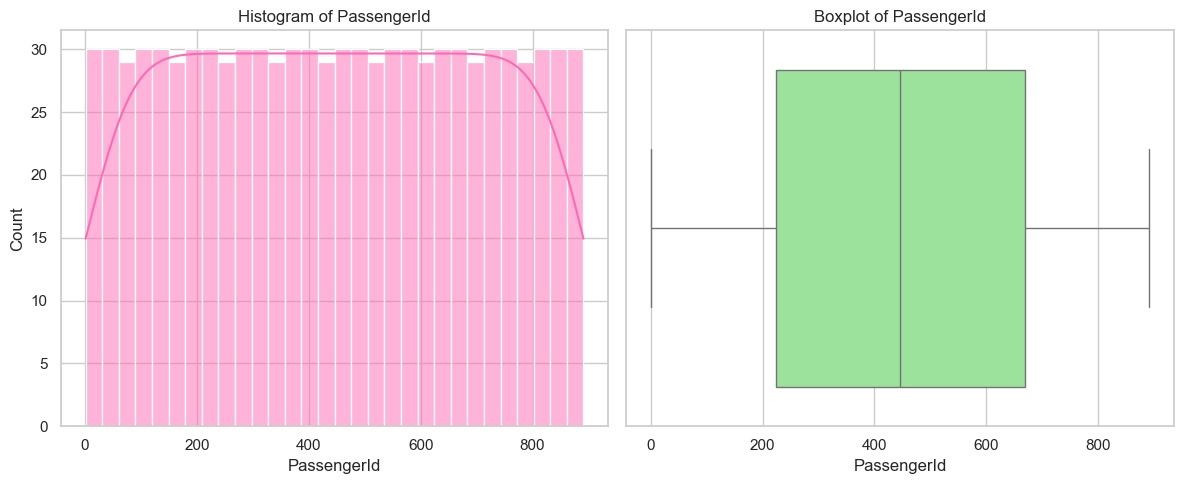

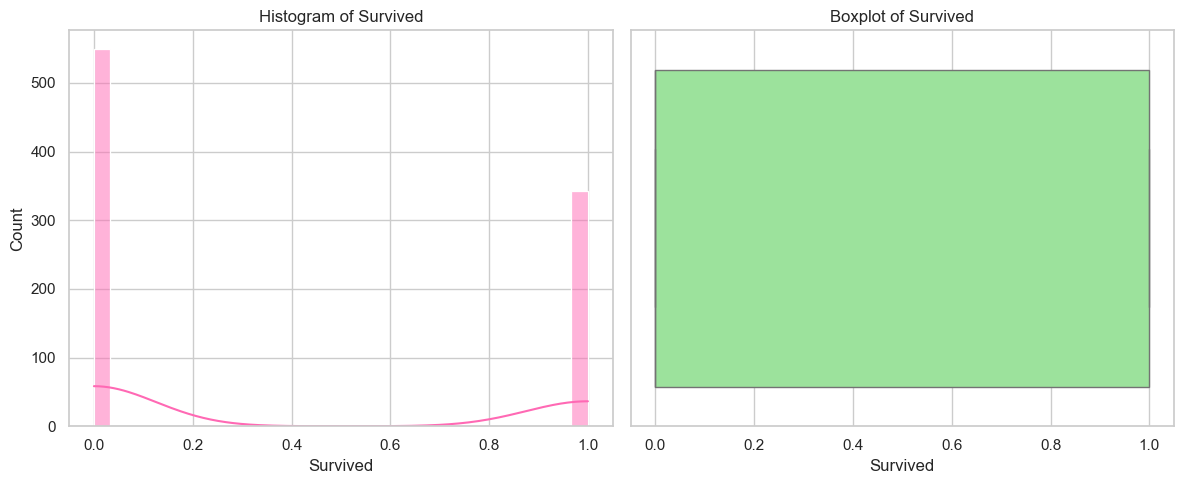

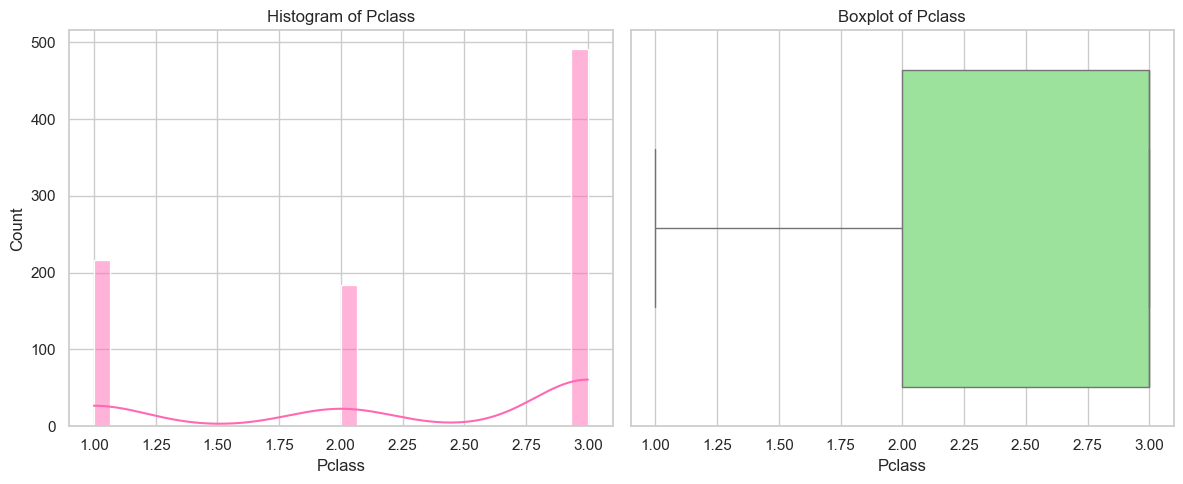

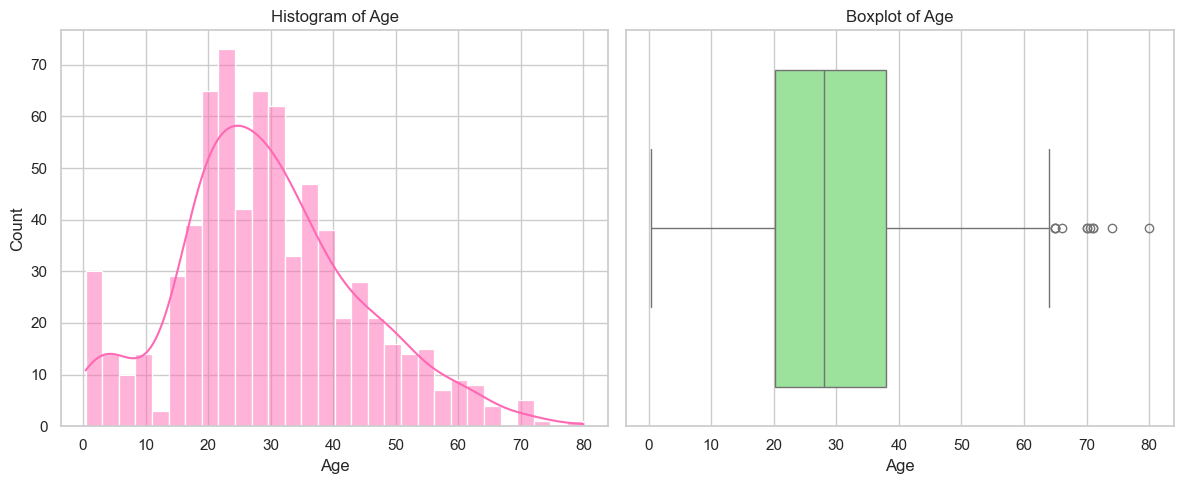

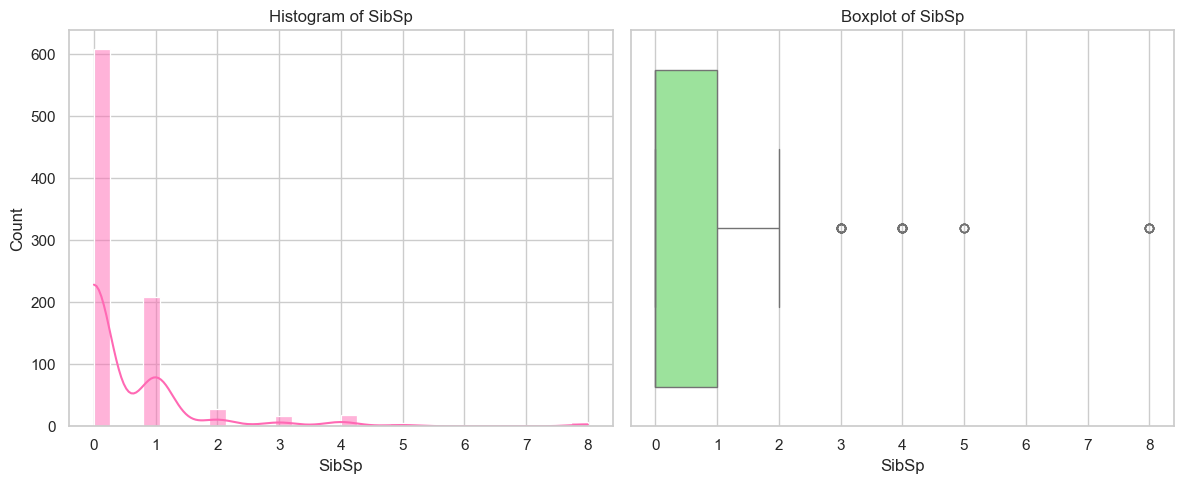

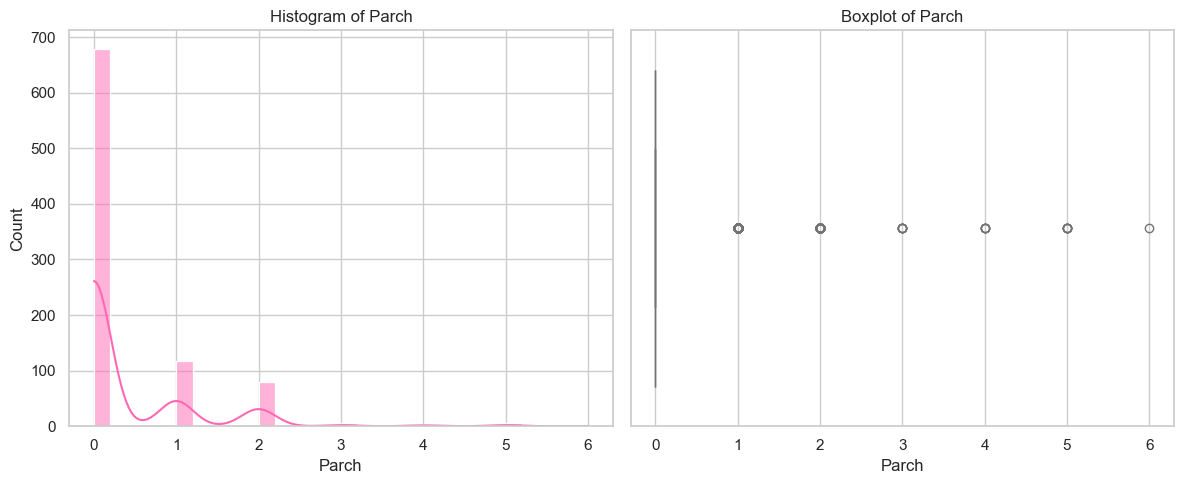

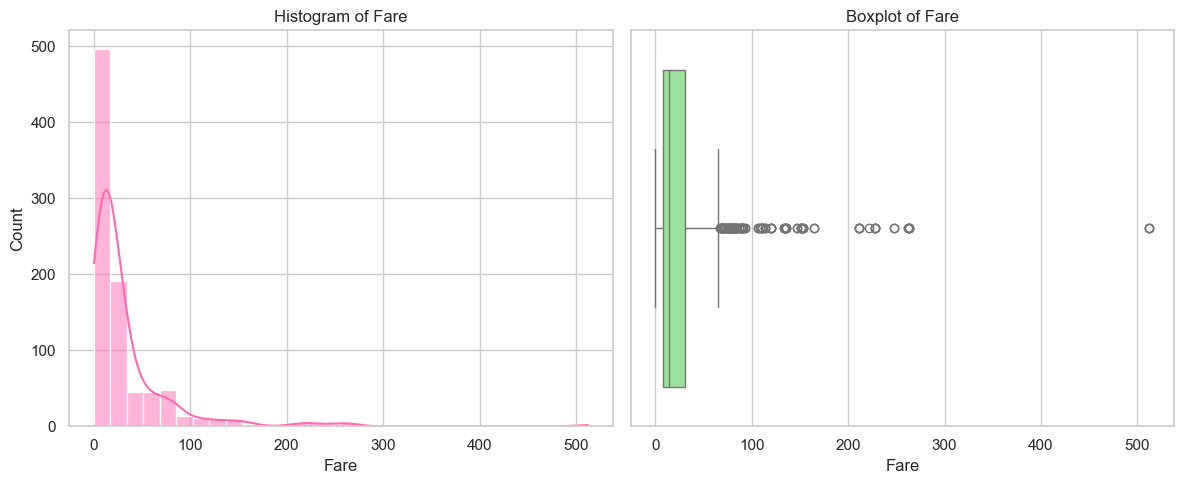

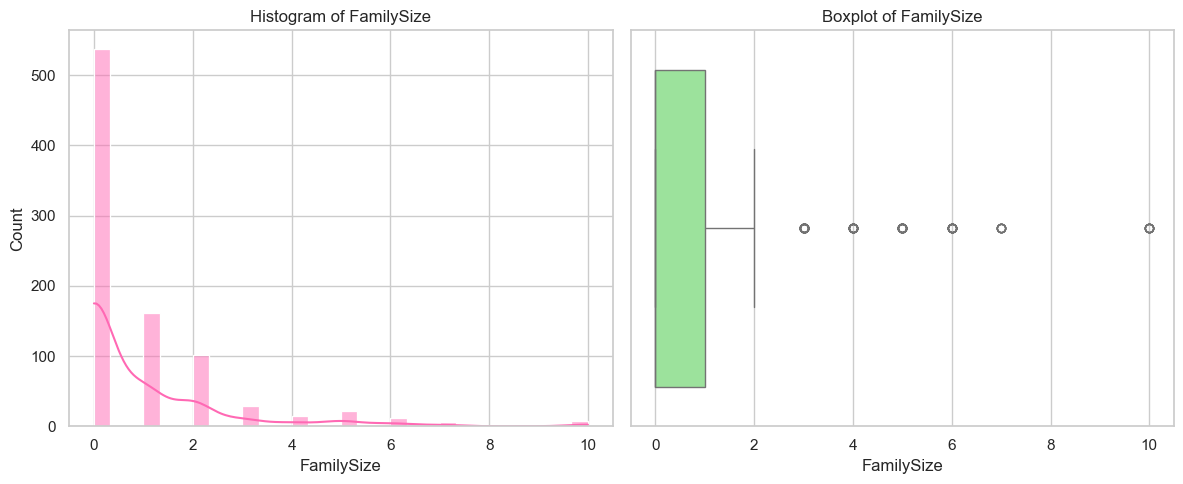

In [91]:
# Create histograms and boxplots for each numeric feature
for feature in numeric_features:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature].dropna(), kde=True, bins=30, color='hotpink')
    plt.title(f'Histogram of {feature}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature], color='lightgreen')
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
    plt.show()

# Using pairplot/correlation matrix for feature relationships.

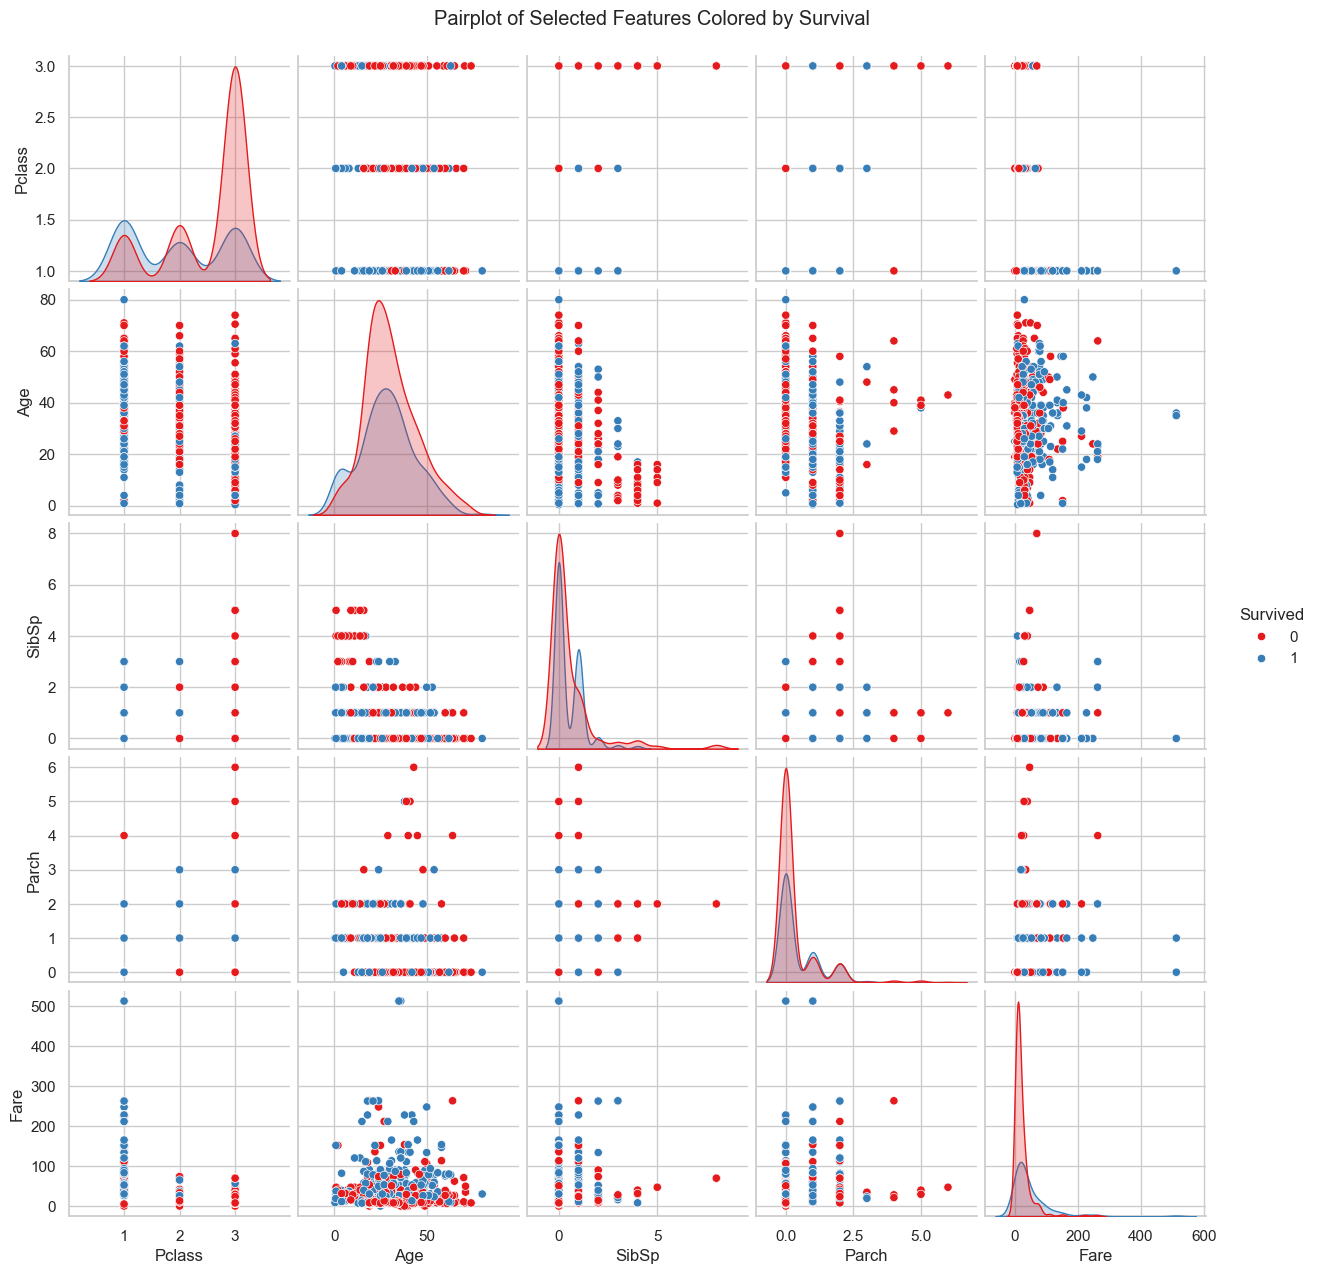

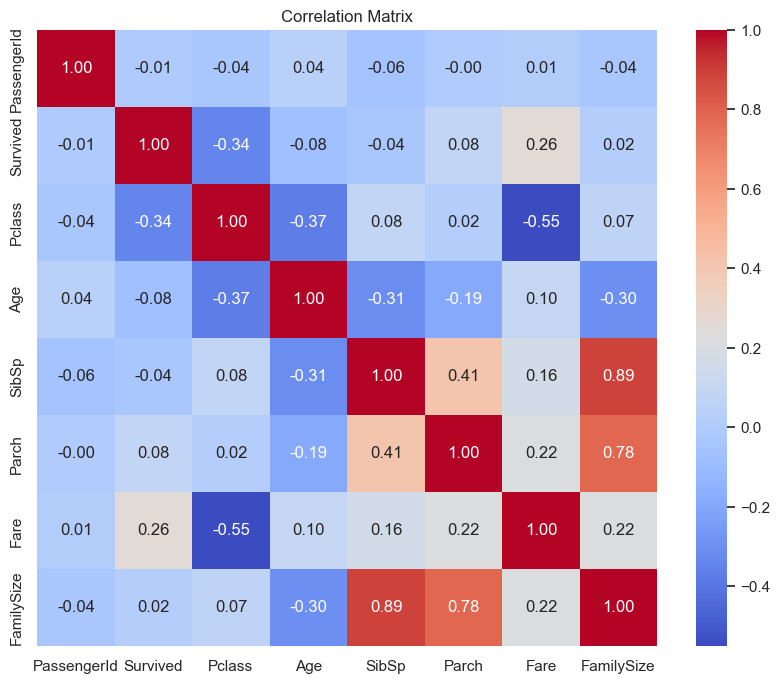

In [93]:

subset_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Create the pairplot
sns.pairplot(df[subset_features], hue='Survived', palette='Set1', diag_kind='kde')
plt.suptitle("Pairplot of Selected Features Colored by Survival", y=1.02)
plt.show()
#7. Correlation Matrix of Numeric Features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Identify patterns, trends, or anomalies in the data.

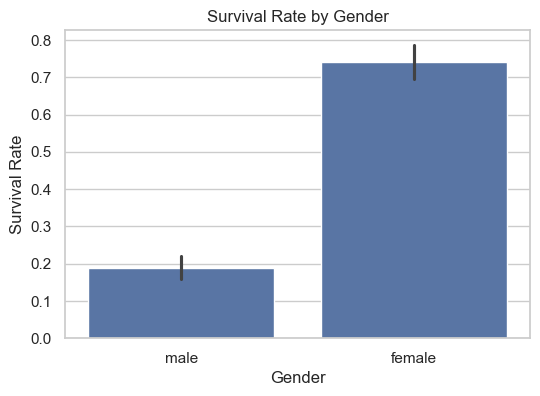

In [65]:
 #Survival rate by Gender
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Sex', y='Survived')
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Gender")
plt.show()

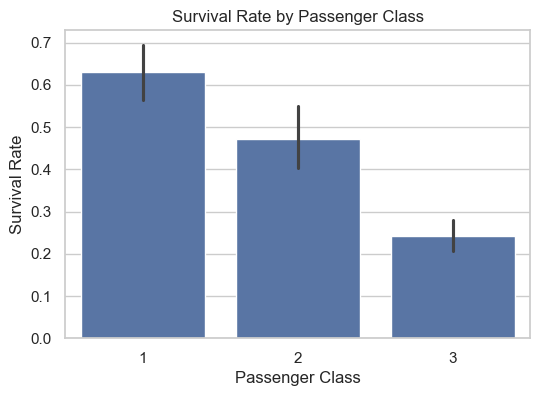

In [67]:
# 2. Survival rate by Passenger Class
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.show()

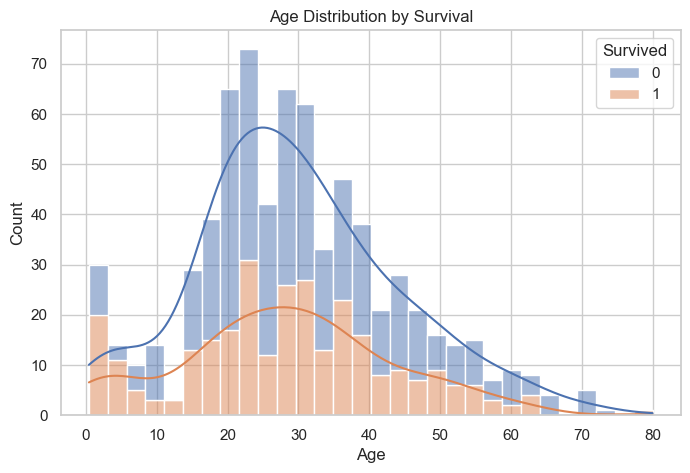

In [69]:
# 3. Age distribution by Survival
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

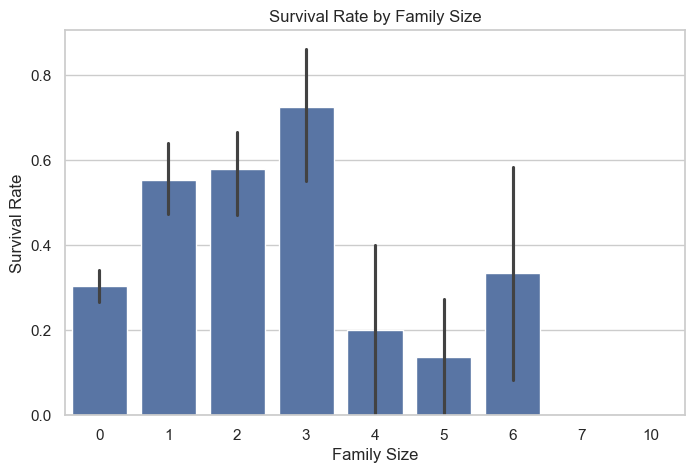

In [71]:
# 4. Survival rate by Family Size (SibSp + Parch)
df['FamilySize'] = df['SibSp'] + df['Parch']
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='FamilySize', y='Survived')
plt.title("Survival Rate by Family Size")
plt.ylabel("Survival Rate")
plt.xlabel("Family Size")
plt.show()


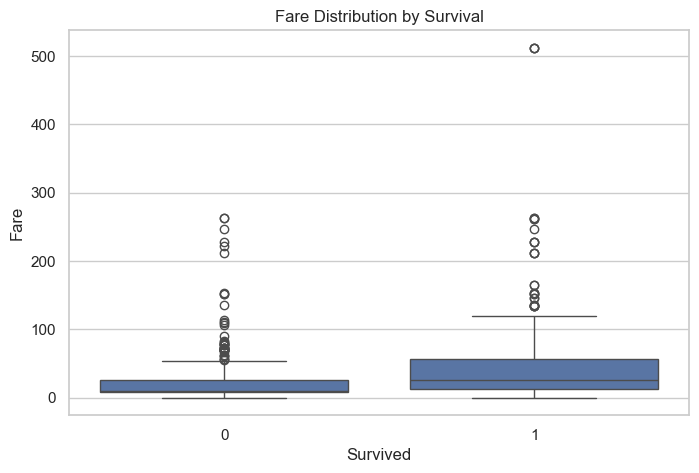

In [73]:
# 5. Fare distribution by Survival
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title("Fare Distribution by Survival")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.show()

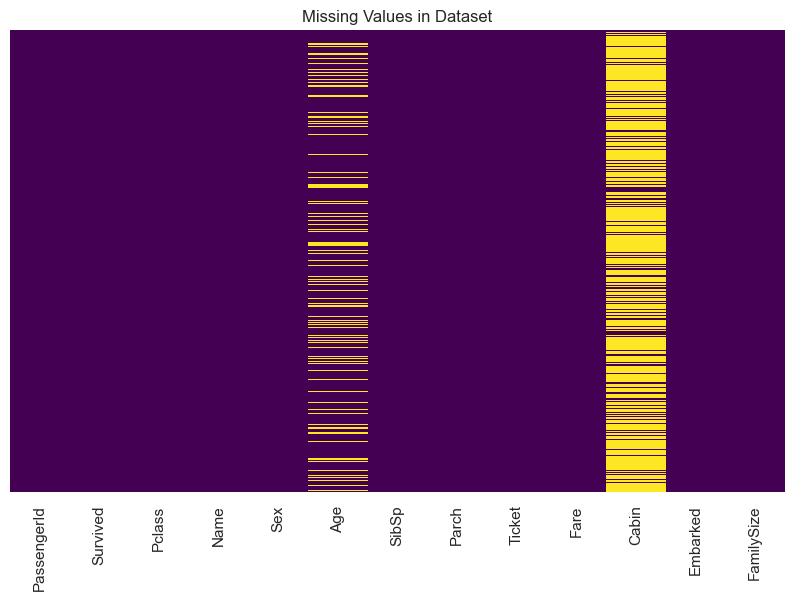

In [75]:
# 6. Missing values heatmap (to show anomalies)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values in Dataset")
plt.show()